In [2]:
import pandas as pd

In [3]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")

In [4]:
airlines.iloc[0]

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object

In [5]:
airports.iloc[0]

id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object

In [6]:
routes.iloc[0]

airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object

In [7]:
airlines.head()

,id,name,alias,iata,icao,callsign,country,active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
4,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N


In [8]:
airports.head()

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby


In [9]:
routes.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [10]:
# Read in the 3 CSV files into 3 separate dataframe objects - airlines, airports, and routes.
# Use the DataFrame.iloc[] method to return the first row in each dataframe as a neat table.
# Display the first rows for all dataframes using the print() function. Try to answer the following questions:
# What's the best way to link the data from these 3 different datasets together?
# What are the formats of the latitude and longitude values?

# routes.airline_id = airlines.id
# routes.source_id = airports.id
# routes.dest_id = airports.id

# location is provided by longitude and latitude

In [11]:
# Create a new basemap instance with the following parameters:
#   projection: "merc"
#   llcrnrlat: -80 degrees
#   urcrnrlat: 80 degrees
#   llcrnrlon: -180 degrees
#   urcrnrlon: 180 degrees
# Assign the instance to the new variable m.

from mpl_toolkits.basemap import Basemap

from matplotlib import pyplot as plt

m = Basemap(projection="merc", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)



In [12]:
# Convert the longitude values from spherical to Cartesian and assign the resulting list to x.
# Convert the latitude values from spherical to Cartesian and assign the resulting list to y.

longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()

x,y = m(longitudes, latitudes)

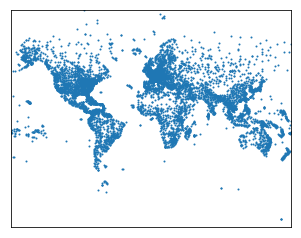

In [15]:
# Create a scatter plot using the converted latitude and longitude values using a marker size of 1.
# Display the scatter plot.

m.scatter(x,y, s=1)
plt.show()

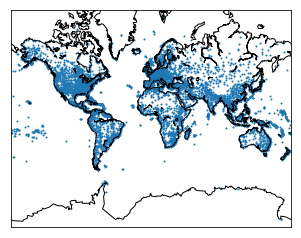

In [16]:
# Use basemap.drawcoastlines() to enable the coast lines to be displayed.
# Display the plot using plt.show().

x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)

m.drawcoastlines()
plt.show()

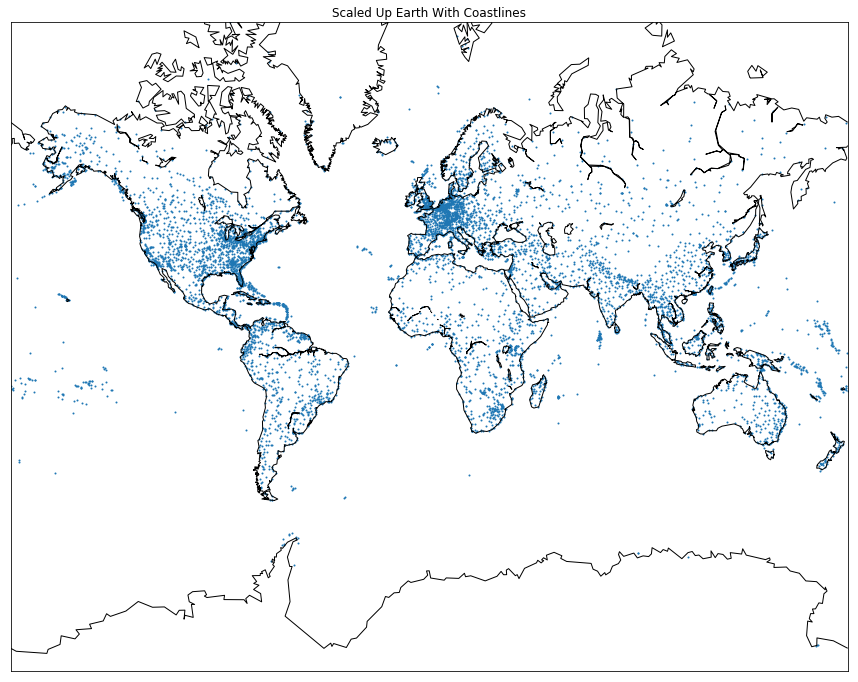

In [17]:
# Before creating the basemap instance and generating the scatter plot, add code that:
#  creates a figure with a height of 15 inches and a width of 20 inches
#  sets the title of the scatter plot to "Scaled Up Earth With Coastlines"

fig, ax = plt.subplots(figsize=(15,20))
ax.set_title("Scaled Up Earth With Coastlines")

x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)

m.drawcoastlines()
plt.show()

In [18]:
#  While the routes dataframe contains the source and destination airports for each route, the latitude and longitude values for each airport are in a separate dataframe (airports).

# routes.airline_id = airlines.id
# routes.source_id = airports.id
# routes.dest_id = airports.id

# airports.loc[airports["id"]==2990]

routes_dest = pd.merge(left=airports, right=routes, left_on="code", right_on="dest", how="inner", suffixes=('_dest', ''))

In [19]:
routes_dest_source = pd.merge(left=airports, right=routes_dest, left_on="code", right_on="source", how="inner", suffixes=("_orig",""))

In [20]:
routes_dest_source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67210 entries, 0 to 67209
Data columns (total 33 columns):
id_orig           67210 non-null int64
name_orig         67210 non-null object
city_orig         67210 non-null object
country_orig      67210 non-null object
code_orig         67210 non-null object
icao_orig         67149 non-null object
latitude_orig     67210 non-null float64
longitude_orig    67210 non-null float64
altitude_orig     67210 non-null int64
offset_orig       67210 non-null float64
dst_orig          67210 non-null object
timezone_orig     67210 non-null object
id                67210 non-null int64
name              67210 non-null object
city              67210 non-null object
country           67210 non-null object
code              67210 non-null object
icao              67145 non-null object
latitude          67210 non-null float64
longitude         67210 non-null float64
altitude          67210 non-null int64
offset            67210 non-null float64
dst      

In [21]:
geo_routes = routes_dest_source[["airline","source", "dest", "equipment", "longitude_orig", "longitude", "latitude_orig", "latitude"]].copy()
geo_routes.rename(columns={'longitude_orig': 'start_lon', 'longitude': 'end_lon', 'latitude':'end_lat', 'latitude_orig':'start_lat'})

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,CG,GKA,MAG,DH8,145.391881,145.788700,-6.081689,-5.207083
1,CG,GKA,HGU,DH8 DHT,145.391881,144.295861,-6.081689,-5.826789
2,CG,GKA,LAE,DH8,145.391881,146.726242,-6.081689,-6.569828
3,CG,GKA,POM,DH8,145.391881,147.220050,-6.081689,-9.443383
4,PX,GKA,POM,DH4 DH8 DH3,145.391881,147.220050,-6.081689,-9.443383
5,CG,MAG,GKA,DH8,145.788700,145.391881,-5.207083,-6.081689
6,CG,MAG,HGU,DH8,145.788700,144.295861,-5.207083,-5.826789
7,CG,MAG,LAE,DH8,145.788700,146.726242,-5.207083,-6.569828
8,PX,MAG,POM,DH4 100,145.788700,147.220050,-5.207083,-9.443383
9,CG,MAG,WWK,DH8,145.788700,143.669186,-5.207083,-3.583828


In [70]:
# Write a function, named create_great_circles() that draws a great circle for each route that has an absolute difference in the latitude and longitude values less than 180. This function should:

# Accept a dataframe as the sole parameter
# Iterate over the rows in the dataframe using DataFrame.iterrows()
# For each row:
#   Draw a great circle using the four geographic coordinates only if:
#   The absolute difference between the latitude values (end_lat and start_lat) is less than 180.
#   If the absolute difference between the longitude values (end_lon and start_lon) is less than 180.
# Create a filtered dataframe containing just the routes that start at the DFW airport.
#   Select only the rows in geo_routes where the value for the source column equals "DFW".
#   Assign the resulting dataframe to dfw.
# Pass dfw into create_great_circles() and display the plot using the pyplot.show() function.

def create_great_circles(sole, m):
    for index, row in sole.iterrows():
        if(abs(row.longitude_orig-row.longitude) < 180 and abs(row.latitude_orig - row.latitude) < 180):
            m.drawgreatcircle(row.longitude_orig, row.latitude_orig, row.longitude, row.latitude)

dfw = geo_routes.loc[geo_routes["source"]=="DFW"]
dfw.longitude_orig.astype(float).fillna(0.0)

dfw.head()

,airline,source,dest,equipment,longitude_orig,longitude,latitude_orig,latitude
50606,AA,DFW,YEG,319,-97.037997,-113.579722,32.896828,53.309723
50607,US,DFW,YEG,319,-97.037997,-113.579722,32.896828,53.309723
50608,AA,DFW,YUL,738,-97.037997,-73.740833,32.896828,45.470556
50609,US,DFW,YUL,738,-97.037997,-73.740833,32.896828,45.470556
50610,WS,DFW,YUL,738,-97.037997,-73.740833,32.896828,45.470556


In [71]:
dfw.longitude_orig.dtypes


dtype('float64')

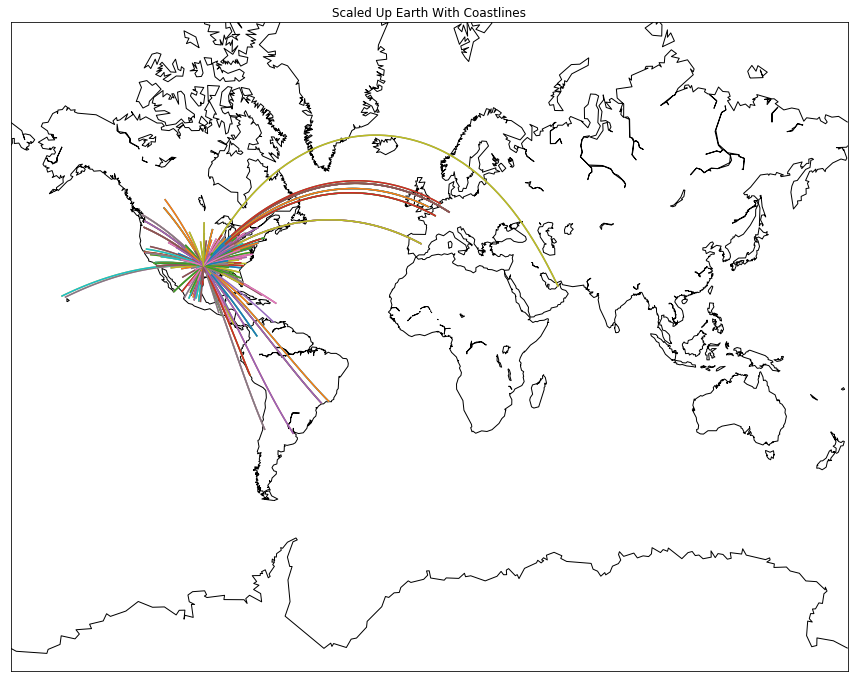

In [72]:
fig, ax = plt.subplots(figsize=(15,20))
ax.set_title("Scaled Up Earth With Coastlines")

x, y = m(dfw.longitude_orig.tolist(), dfw.latitude_orig.tolist())
m.scatter(x, y, s=1)

m.drawcoastlines()

create_great_circles(dfw, m)

plt.show()